In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
df = pd.read_csv(r"C:\Entri\Data_Analyis_project\AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [70]:
#List of columns in the dataset
df.columns.to_list()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [71]:
#Data types of columns
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [72]:
#Total rows and columns
print("There are {} rows and {} columns in the dataset".format(df.shape[0], df.shape[1]))

There are 48895 rows and 16 columns in the dataset


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [74]:
#Statistical summary of important numerical parameters
df[['price','minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count','availability_365']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,48895.0,152.720687,240.154170,0.00,69.00,106.00,175.00,10000.0
minimum_nights,48895.0,7.029962,20.510550,1.00,1.00,3.00,5.00,1250.0
number_of_reviews,48895.0,23.274466,44.550582,0.00,1.00,5.00,24.00,629.0
reviews_per_month,38843.0,1.373221,1.680442,0.01,0.19,0.72,2.02,58.5
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00,1.00,1.00,2.00,327.0
availability_365,48895.0,112.781327,131.622289,0.00,0.00,45.00,227.00,365.0


Important insights form statistical summary: Outliers in important variables like 'price' and 'minimum_nights' column should be addressed.

Price column values ranges from 0 to 10,000 dollars which indicates the presence of outliers.
minimum_nights is the minimum number of nights for which the guest is expected to book the property. The maximum value for minimum nights is found to be 1250. This is close to 3.5 years, which is not a realistic expectation.

# Data Cleaning

### Identifying duplicate rows 

In [75]:
#Sum of duplicate rows in the dataset
df.duplicated().sum()

0

There are no duplicate rows in the dataset

Missing values are found in 'name','host_name','last_review' and reviews_per_month columns.
NaN values are found in 'last_review' and 'review_per_month' as these hosted sites may not have recieved any reviews from customers or these places would be least preferred by customers.

In [76]:
#Dropping columns id and last_review, as they area not of much relevance for the analysis.
df1=df.drop(['id','last_review'],axis=1)
df1.head(2)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


In [77]:
print("There are {} rows and {} columns in the dataset after removing irrelevant columns".format(df1.shape[0], df1.shape[1]))

There are 48895 rows and 14 columns in the dataset after removing irrelevant columns


In [78]:
#count of missing values in the dataset
df1.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Missing values are found in 'name','hostname'and 'reviews_per_month' columns.

#### Replacing missing values in name,host_name and reviews_per_month columns

In [79]:
# Replacing missing values in 'name' and 'host_name' columns with 'Unknown'
df1["name"].replace(np.nan, "Unknown", inplace=True)
df1["host_name"].replace(np.nan, "Unknown", inplace=True)

In [80]:
#Replacing missing values in reviews_per_month with 0
df1['reviews_per_month'].replace(np.nan,0, inplace=True)

In [81]:
#count of null values
df1.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

 As shown in the above columnwise summary, all the NaN values in the dataset has been replaced.

#### Categorical and numerical columns in the dataset

In [82]:
print("Categorical columns are:\n",df1.select_dtypes(include=['object']).columns.tolist())
print("\nNumerical columns are:\n",df1.select_dtypes(exclude=['object']).columns.tolist())

Categorical columns are:
 ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']

Numerical columns are:
 ['host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


#### Unique values of categorical columns

In [83]:
columns = ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']
for column in columns:
    print('\033[1m',column,'\033[0m')
    print("Unique Values:",df1[column].unique())
    print("Length:",df1[column].nunique(),"\n")

 name 
Unique Values: ['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' ...
 'Sunny Studio at Historical Neighborhood'
 '43rd St. Time Square-cozy single bed'
 "Trendy duplex in the very heart of Hell's Kitchen"]
Length: 47906 

 host_name 
Unique Values: ['John' 'Jennifer' 'Elisabeth' ... 'Abayomi' 'Alberth' 'Ilgar & Aysel']
Length: 11453 

 neighbourhood_group 
Unique Values: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Length: 5 

 neighbourhood 
Unique Values: ['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'W

There are, 47906 unique Airbnb listings, 11453 - hosts, 5- neighbourhood groups, 221 - neighbourhoods
and 3 unique room types. 

### Analysis of data distribution of important numerical parameters.

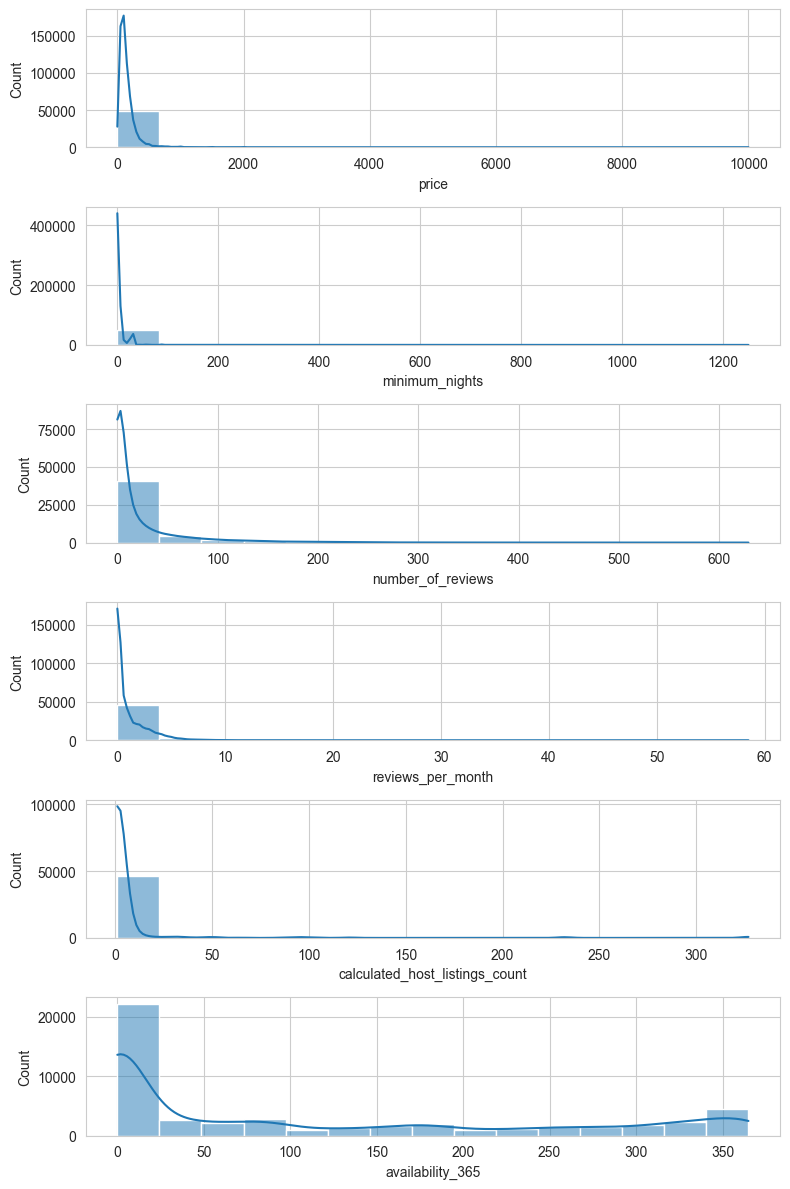

In [84]:
"""Histplots for relevant numerical columns:price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
   'calculated_host_listings_count', 'availability_365'"""

selected_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                    'calculated_host_listings_count', 'availability_365']


fig, axes = plt.subplots(nrows=len(selected_columns), ncols=1, figsize=(8, 12))
for i, col in enumerate(selected_columns):
    sns.histplot(df1[col], kde=True, bins = 15,ax=axes[i])
    
plt.tight_layout()
plt.show()

- 'reviews_per_month' and 'number_of_reviews' column values, shows wide variation as it depends upon customer preference and  popularity of each property or location and  willingness to provide feedback. 
- Apart from these rows, the histograms for 'price', 'minimum_nights',shows wide range of distribution. These columns should be analysed further for outlier detection.
- Calculated_host_listings_count, which is the number of properties owned by a host ranges from 1 to more than 300.

In availability_365 column, most of the properties (75%) are available for 214 days (7 months) in a year. Maximum availability is 365 days which means that a few properties are available for an entire year, which could be because these listings  have not recieved any bookings yet or they are currently not operating.

In [85]:
count_365 =(df1['availability_365']==365).sum()
count_365

1295

There are 1295 properties listed with an availability of 365 days.

#### Analaysing 'price' and 'minimum_nights' columns for outlier detection

#### Price

In [86]:
#Statistical summary of price
df1.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Minimum price is 0 dollars and maximum is 10000 dollars. The average rental price in New York city, is found to be around 153 dollars.75% of price values are under $175.

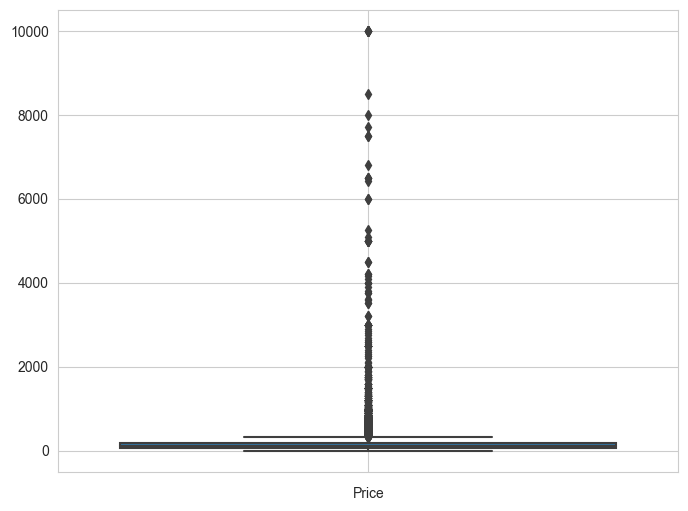

In [87]:
# Box plot for price column

plt.figure(figsize=(8,6))  
sns.boxplot(y=df1.price)
plt.xlabel('Price')
plt.grid(True)
plt.gca().set(ylabel='')
plt.show()

There are outliers in price.

Analysing prices equal to 0 and above 500 dollars.

In [88]:
# checking for prices values above 500
price_greaterthan_1000 =len(df1[df1['price'] > 500])
print("Number of price values greater than 500 :",price_greaterthan_1000)

percentage = round((price_greaterthan_1000/df1.shape[0])*100,2)
print("Percentage :",percentage,"%")

Number of price values greater than 500 : 1044
Percentage : 2.14 %


In [89]:
# checking for price values equal to 0
price_equalto_0 = len(df1[df1['price'] == 0])
print("Number of price values equal to 0 :",price_equalto_0)

percentage = round((price_equalto_0/df1.shape[0])*100,3)
print("Percentage :",percentage,"%")

Number of price values equal to 0 : 11
Percentage : 0.022 %


As listed above, we have only 1044 (2.14 %) price values above 500 and 11 (0.022 %) values, where price is equal to zero.

In [90]:
#Replacing price values equal to 0 as NaN
df1['price'] = df1['price'].replace(0, np.nan)
#count of NaN values in price
df1['price'].isnull().sum()

11

Removing price outliers using IQR Method

In [91]:
column = 'price'

#Lower and upper quartiles
Q1 = df1[column].quantile(0.25)
Q3 = df1[column].quantile(0.75)


#IQR (Interquartile Range)
IQR = Q3 - Q1

#lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound=",lower_bound,"\nUpper Bound=",upper_bound)

# Detecting outliers based on the bounds
print("Outliers detected using IQR Method:")
outlier = df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)]
outlier

Lower Bound= -90.0 
Upper Bound= 334.0
Outliers detected using IQR Method:


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
61,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375.0,180,5,0.12,1,180
85,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800.0,1,25,0.24,1,7
103,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500.0,4,46,0.55,2,243
114,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350.0,2,7,0.06,4,298
121,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400.0,2,16,0.24,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350.0,2,0,0.00,1,364
48833,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475.0,2,0,0.00,1,64
48839,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800.0,1,0,0.00,1,23
48842,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350.0,1,0,0.00,1,9


In [92]:
print("There are {} outliers in price  ".format(outlier.shape[0]))
print ("Percentage of outliers in price :",round((outlier.shape[0]/df1.shape[0])*100,2),"%")

There are 2972 outliers in price  
Percentage of outliers in price : 6.08 %


In [93]:
#Removing price outliers
df1=df1[(df1[column]>lower_bound) & (df1[column]<upper_bound)]
df1

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,0.00,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,0.00,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,0.00,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,0.00,6,2


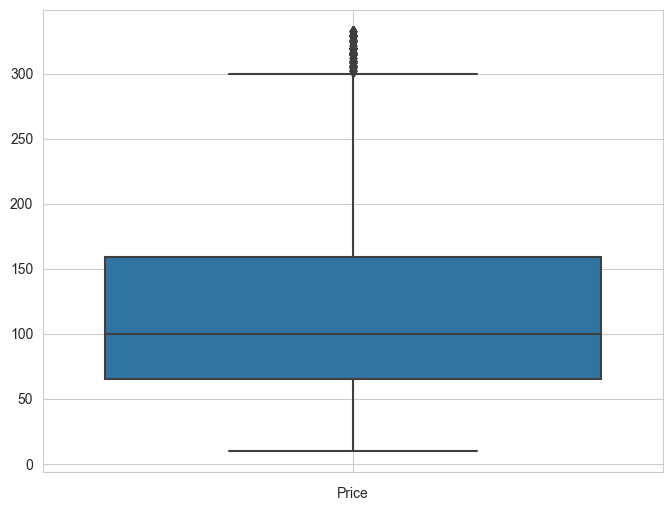

In [94]:
# Box plot of price after removal of outliers
plt.figure(figsize=(8,6))  
sns.boxplot(y=df1.price)
plt.xlabel('Price')
plt.grid(True)
plt.gca().set(ylabel='')
plt.show()

Text(0.5, 1.0, 'Frequency Distribution of Price')

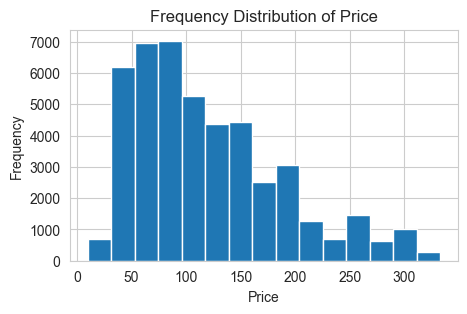

In [95]:
#Frequency distribution of price after removal of outliers
df1['price'].hist(bins=15, figsize=(5,3))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title("Frequency Distribution of Price")

#### Minimum nights

In [96]:
#Statistical summary of minimum_nights
df1.minimum_nights.describe()

count    45907.00000
mean         6.93587
std         19.85941
min          1.00000
25%          1.00000
50%          2.00000
75%          5.00000
max       1250.00000
Name: minimum_nights, dtype: float64

Minimum number of nights for which guest is supposed to book property is 1 night and maximum is 1250 nights. 75% of values are below 5 nights.

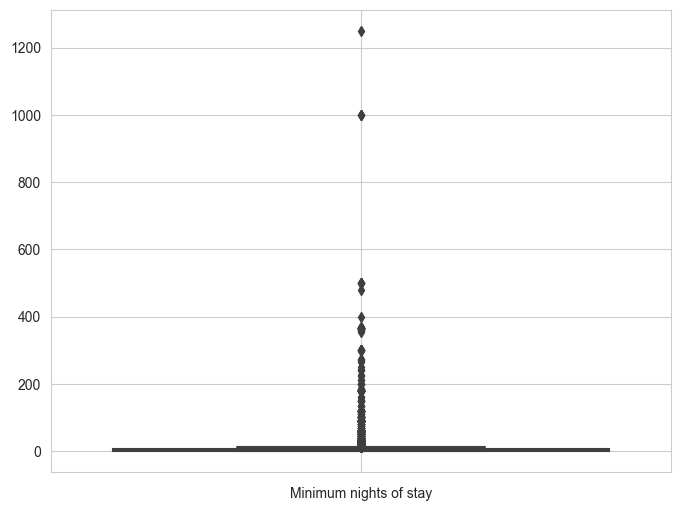

In [97]:
# Box plot for minimum_nights

plt.figure(figsize=(8,6))  
sns.boxplot(y=df1.minimum_nights)
plt.xlabel('Minimum nights of stay')
plt.grid(True)
plt.gca().set(ylabel='')
plt.show()

There is a wide spread in the minimum_nights values.

Analysing minimum_nights values above 30

In [98]:
print("Total number of values above 30 nights")
print(len(df1[df1['minimum_nights']>30]))
percentage = round((len(df1[df1['minimum_nights']>30])/df1.shape[0])*100,2)
print("Percentage :",percentage,"%")

Total number of values above 30 nights
686
Percentage : 1.49 %


There are only 686 (1.49 %) values in minimum_nights which are above 30.

Distribution of properties with minimum nights less than 30.

Text(0, 0.5, 'Frequency')

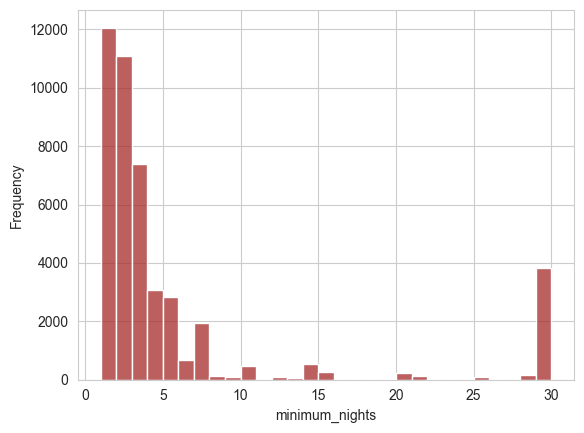

In [99]:
sns.histplot(df1[df1['minimum_nights'] <= 30], x='minimum_nights', binwidth=1, kde=False, color='brown')
plt.ylabel('Frequency')

Majority of properties have a low minimum stay requirement (between 1 to 5 nights).Few of them have minimum requirement of almost a month.
As mentioned above, there are only 1.49 % of values with minimum_nights requirement above 30 and more than 75% values are less than 5 nights. Therefore considering them to be outliers and removing them.

In [100]:
df1 = df1[df1['minimum_nights']<=30]

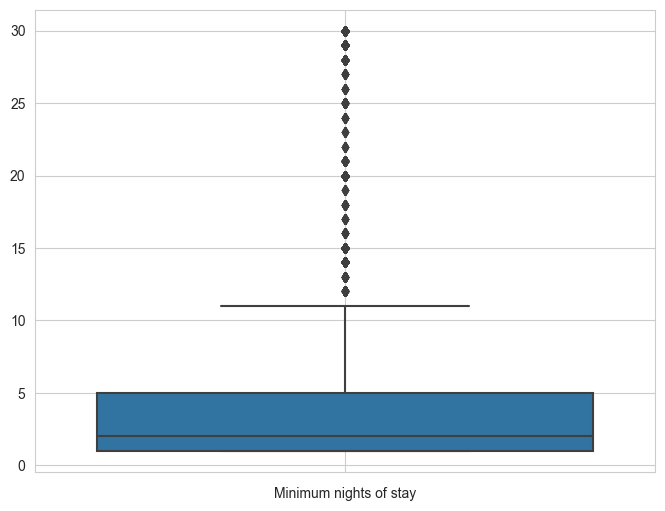

In [101]:
# boxplot of minimum nights

plt.figure(figsize=(8,6))  
sns.boxplot(y=df1.minimum_nights)
plt.xlabel('Minimum nights of stay')
plt.grid(True)
plt.gca().set(ylabel='')
plt.show()

minimum_nights still has some outliers, but these values are being retained, considering 30 nights as minimum_stay threshold.

In [102]:
df1.shape

(45221, 14)

There are now 45221 rows after removing outliers.

# Exploratory Data Analysis

#### Correlation between important numerical parameters

In [103]:
selected_columns = df1[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

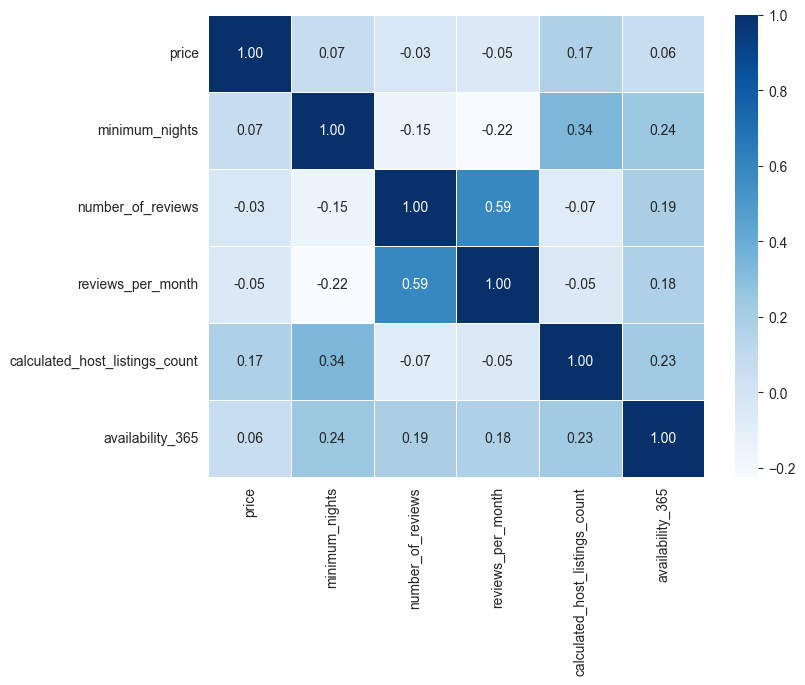

In [104]:
#calculation of correlation matrix
correlation_matrix = selected_columns.corr()

# plotting heatmap
plt.figure(figsize=(8,6))

sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)

# Display the plot
plt.show()

A moderately postive linear correlation is found between 'number_of_reviews' and 'reviews_per_month', as there are chances of higher rate of reviews per month if there are more number of reviews. There is no significant correlation found, among the rest of the variables.

#### Neighbourhood and Neighbourhood groups with most number of listings

In [105]:
print("The Neighbourhood groups are :",df1['neighbourhood_group'].unique())

The Neighbourhood groups are : ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


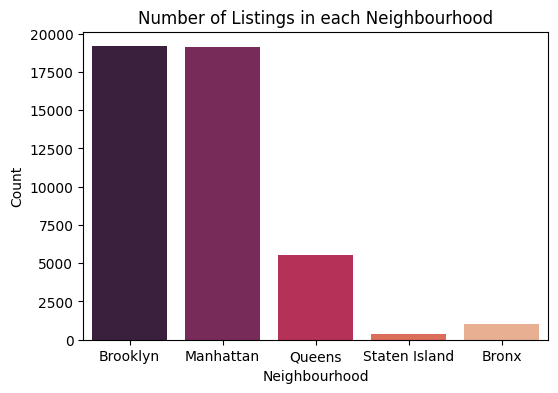

In [43]:
plt.figure(figsize=(6,4))

colors = sns.color_palette('rocket', n_colors=5)

sns.countplot(data=df1, x='neighbourhood_group',palette=colors)

plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Number of Listings in each Neighbourhood')

plt.show()

Brooklyn and Manhattan are the most preferred locations as they have most number of Airbnb listings in Newyork city.

The top 10 neighbourhoods with most number of listings

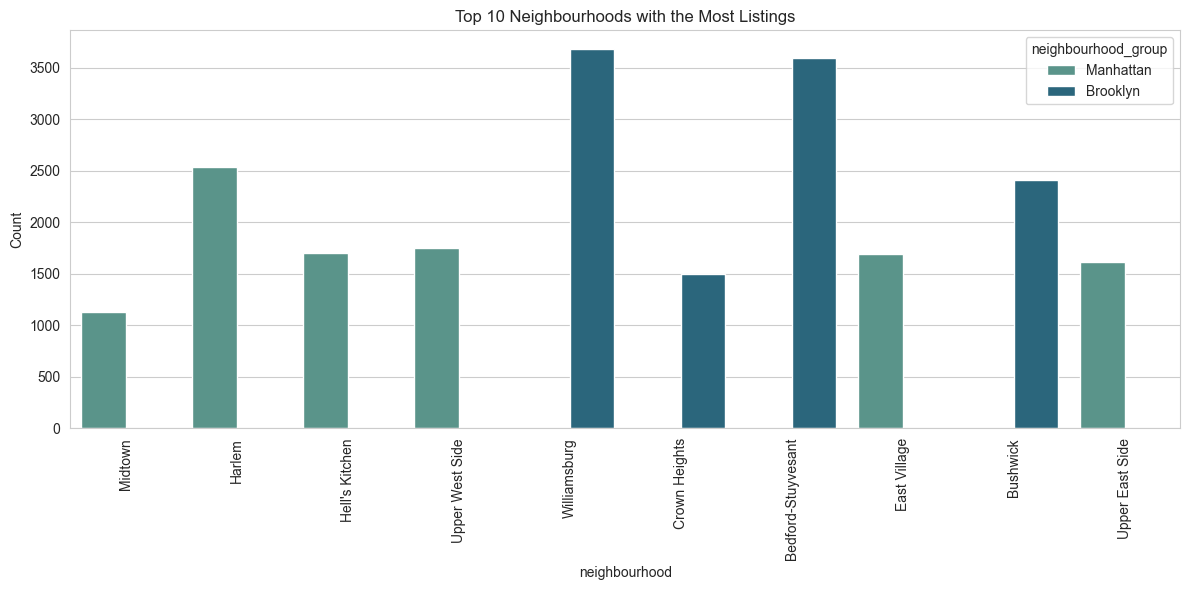

In [110]:
# top 10 neighborhoods with the highest number of listings
top_10_neighborhoods = df1['neighbourhood'].value_counts().nlargest(10).index

# Filtering the DataFrame to include only the top 10 neighborhoods
df_top_10 = df1[df1['neighbourhood'].isin(top_10_neighborhoods)]

plt.figure(figsize=(12, 6))
colors = sns.color_palette('crest', n_colors=2)
sns.countplot(data=df_top_10, x='neighbourhood', hue = 'neighbourhood_group',palette=colors)

plt.xlabel('neighbourhood')
plt.ylabel('Count')
plt.title('Top 10 Neighbourhoods with the Most Listings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Above are the top 10 popular neighbourhoods, and most of them are either in Manhattan or Brooklyn.

#### Latitudinal and longitudinal distribution of listings across Neighbourhood Groups

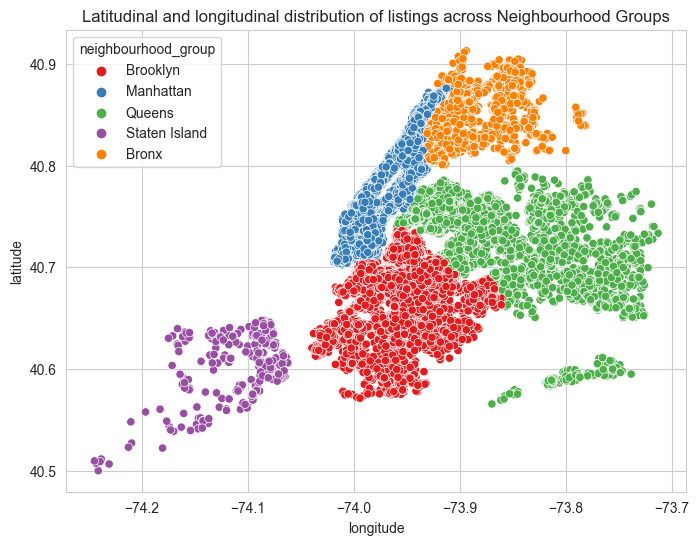

In [123]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df1.longitude,y=df1.latitude,hue=df1.neighbourhood_group,palette='Set1')
plt.title("Latitudinal and longitudinal distribution of listings across Neighbourhood Groups")
plt.show()

Properties listed in Queens and Staten Island are scattered, Brooklyn and Manhattan have a crowded group of listings.

#### Average price of properties in each neighbourhood group

In [38]:
# Group the data by 'Neighbourhood Group' and calculate the mean price for each group
average_price_per_group = df1.groupby('neighbourhood_group')['price'].mean().reset_index()

#average price for each neighborhood group
print("Average price of properties in each neighbourhood group:")
average_price_per_group

Average price of properties in each neighbourhood group:


,neighbourhood_group,price
0,Bronx,77.544508
1,Brooklyn,105.754226
2,Manhattan,145.910251
3,Queens,89.092277
4,Staten Island,89.504155


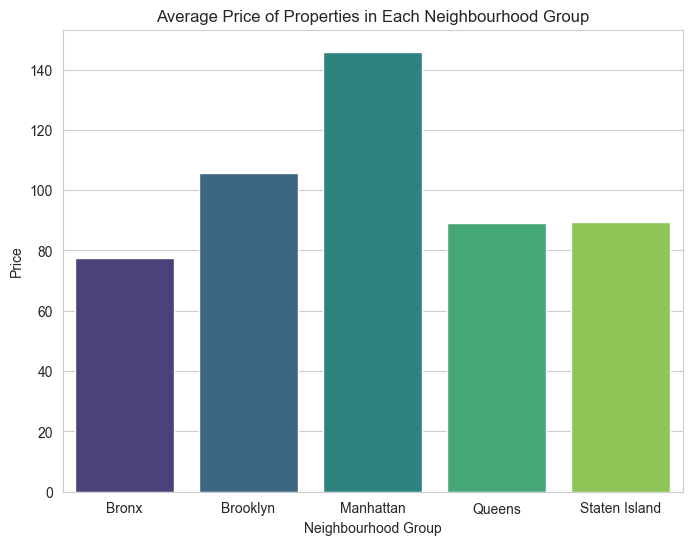

In [39]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.barplot(x='neighbourhood_group', y='price', data=average_price_per_group, palette='viridis')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.title('Average Price of Properties in Each Neighbourhood Group')
plt.show()

Manhattan is found to have the most expensive properties, followed by Brooklyn when compared to the rest of the city.

#### Most common room type 

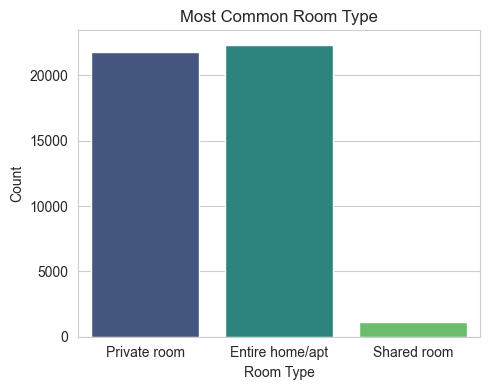

In [48]:
plt.figure(figsize=(5,4))

sns.countplot(data=df1, x='room_type', palette='viridis')

plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Most Common Room Type')

plt.tight_layout()
plt.show()

Among the three different room types, Entire homes or apartments are maximum in number, followed by private rooms. Customer preference for shared rooms are very low.

#### Price Distribution of room types

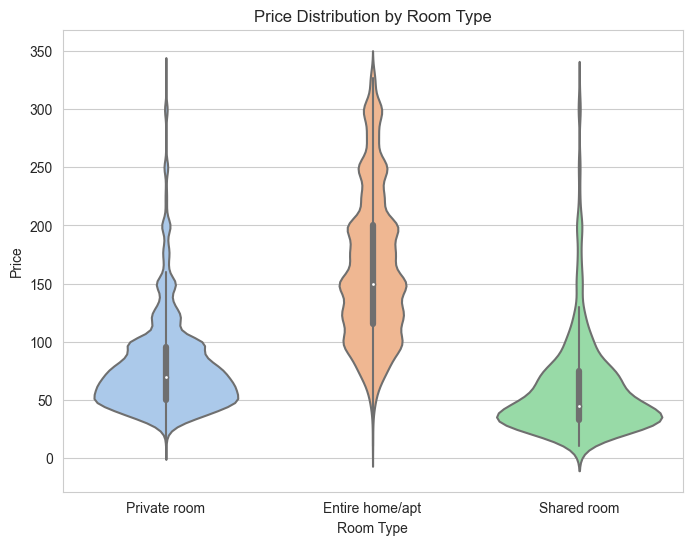

In [89]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.violinplot(x='room_type', y='price', data=df1, palette='pastel')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Price Distribution by Room Type')
plt.show()

Entire home or apartments are the most expensive.

#### Room count in each neighbourhood group

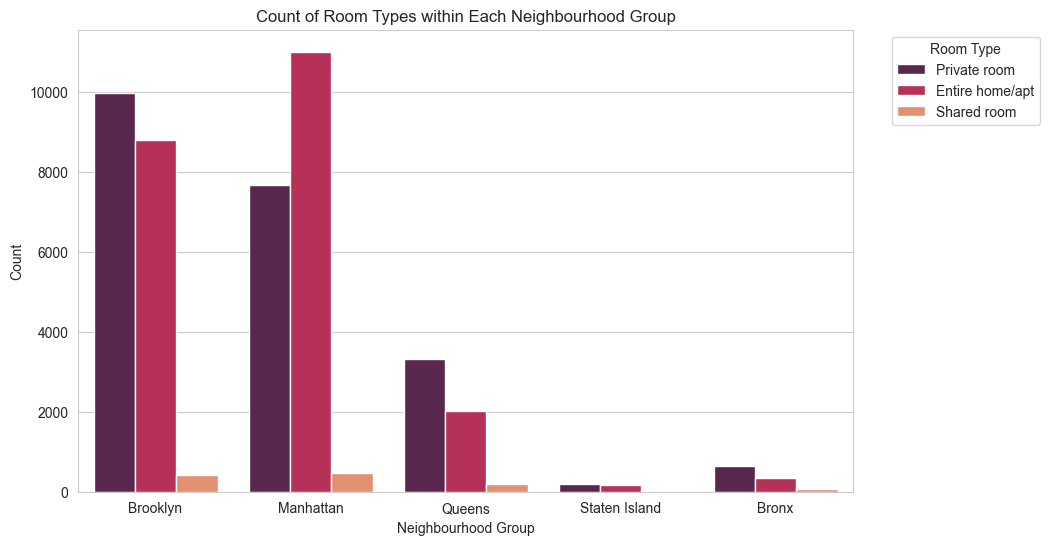

In [41]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='neighbourhood_group', hue='room_type', data=df1, palette='rocket')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Count of Room Types within Each Neighbourhood Group')
plt.legend(title='Room Type', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

Brooklyn, Queens and Bronx have more number of private rooms whereas Manhattan which has the maximum number of listings in the entire Newyork city, has more number of entire homes or apartments.

#### Average price according to room type in different neighbourhoods

In [63]:
average_price = df1.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack(level=1)
average_price

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,113.209632,60.714729,47.637931
Brooklyn,148.422386,70.407649,48.224138
Manhattan,182.089479,98.169427,76.098684
Queens,131.493519,65.860241,47.373684
Staten Island,121.644578,62.370968,57.444444


Text(0, 0.5, 'Price')

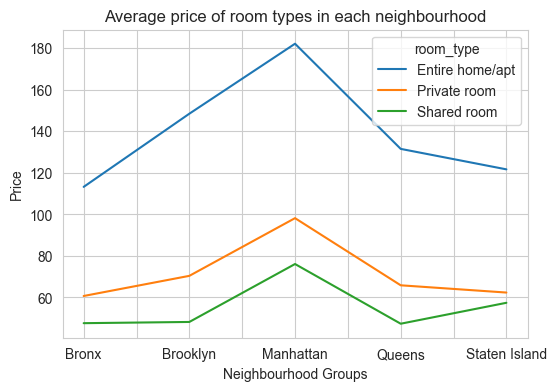

In [67]:
average_price.plot(kind='line',figsize=(6,4))
plt.title('Average price of room types in each neighbourhood')
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Price')

Based on location and room type price of the listing varies. In all the neighbourhoods entire homes or apartments are expensive compared to private rooms and shared rooms. Except in Manhattan, average price of shared rooms in all other neighbourhood groups are almost the same. Cheapest among all is Bronx.

#### Average minimum nights for each room type

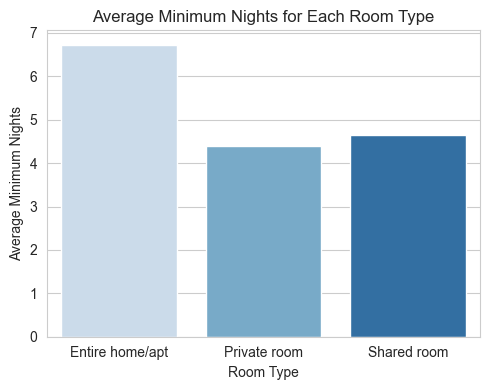

In [54]:
# Average minimum nights for each room type
average_min_nights = df1.groupby('room_type')['minimum_nights'].mean().reset_index()

plt.figure(figsize=(5,4))

sns.barplot(data=average_min_nights, x='room_type', y='minimum_nights', errorbar=None,palette='Blues')

plt.xlabel('Room Type')
plt.ylabel('Average Minimum Nights')
plt.title('Average Minimum Nights for Each Room Type')
plt.tight_layout()
plt.show()

Guests prefer an entire home or apartments for above 6 nights of of stay. Private rooms and shared rooms are preferred for a maximum of 4-5 nights.

#### Minimum number of nights for various room types across neighbourhood groups

In [106]:
print("Average minimum nights of booking required for diffrent room types across neighbourhood groups:")
min_nights = df1.groupby(['neighbourhood_group','room_type'])['minimum_nights'].mean().unstack(level=1)
min_nights

Average minimum nights of booking required for diffrent room types across neighbourhood groups:


room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,3.597734,3.167442,1.896552
Brooklyn,5.156818,4.559727,7.334975
Manhattan,8.559880,4.289813,3.195175
Queens,4.301097,4.484940,3.405263
Staten Island,3.981928,3.327957,2.333333


Text(0, 0.5, 'Minimum number of nights')

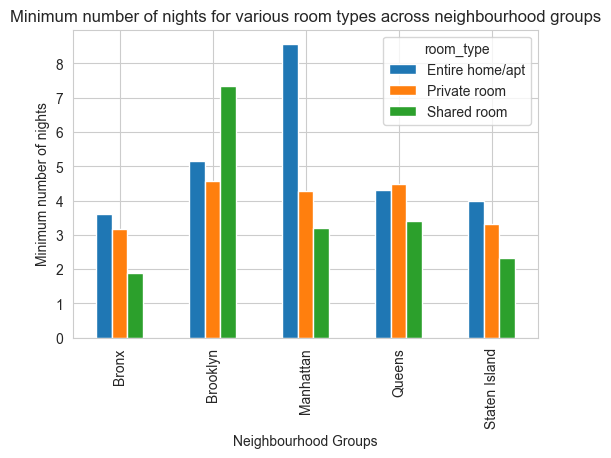

In [109]:
min_nights.plot(kind='bar',figsize=(6,4))
plt.title('Minimum number of nights for various room types across neighbourhood groups')
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Minimum number of nights')

- Manhattan entire rooms or apartments have longest minimum stay requirement (7 nights or more), followed by private rooms (4-5 nights).
This suggests that hosts who have listed an entire apartment or home prefer guests interested in longer stays, possibly to   provide a more immersive experience or to ensure a stable occupancy rate. In case of private rooms,there is a balance between shorter and slightly longer stays, where the hosts aim to accommodate a range of guests, catering to both short-term visitors and those seeking a more extended stay.
- Brooklyn has more than 7 nights minimum stay requirement for shared rooms and 4-5 nights for entire homes and private rooms.
This indicates that Brooklyn have a mix of options for guests interested in a slightly extended stay while still catering to travelers seeking shorter visits.
- Bronx, queens and Staten Island have entire homes or apartments with avaerage minimum stay requirement of 3-5 nights and shared rooms with 2-3 nights minimum stay.
These neighbourhoods have flexible options and caters to a diverse range of guests, accommodating both short-term travelers and those looking for a moderate length of stay.

#### Availability of rooms by neighbourhood group

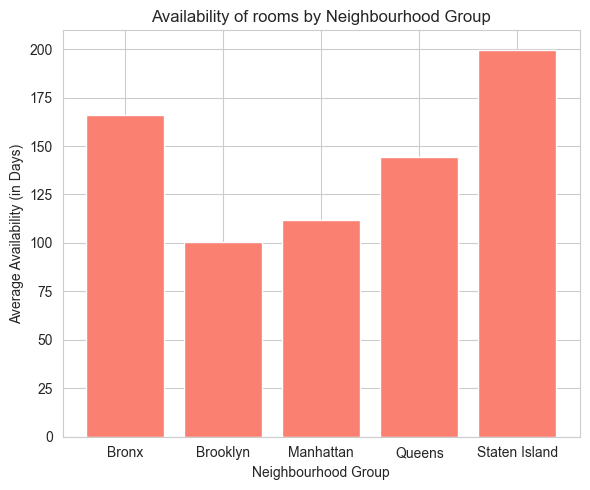

In [108]:
# Group by 'neighbourhood_group' and calculating the mean availability for each group
availability_by_group = df.groupby('neighbourhood_group')['availability_365'].mean().reset_index()


plt.figure(figsize=(6,5))
ax = plt.gca()
plt.bar(availability_by_group['neighbourhood_group'], availability_by_group['availability_365'], color='salmon')

plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Availability (in Days)')
plt.title('Availability of rooms by Neighbourhood Group')

plt.tight_layout()
plt.show()

Maximum number of properties which are available almost all throughout the year is found in Staten Island followed by Bronx, which are less populated compared to busiest neighbourhoods like Manhattan and Brooklyn.

#### Availability of Properties Across Neighborhood Groups for Different Room Types

In [45]:
# Grouping by neighbourhood group and room type, and summing up availability
print("Availability(in days) of properties across neighbourhood groups:")
availability = df1.groupby(['neighbourhood_group', 'room_type'])['availability_365'].mean().unstack()
availability

Availability(in days) of properties across neighbourhood groups:


room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,154.628895,170.617054,151.620690
Brooklyn,92.723750,99.120558,178.076355
Manhattan,106.971629,97.946263,139.375000
Queens,128.010469,148.725904,195.021053
Staten Island,177.590361,225.021505,64.777778


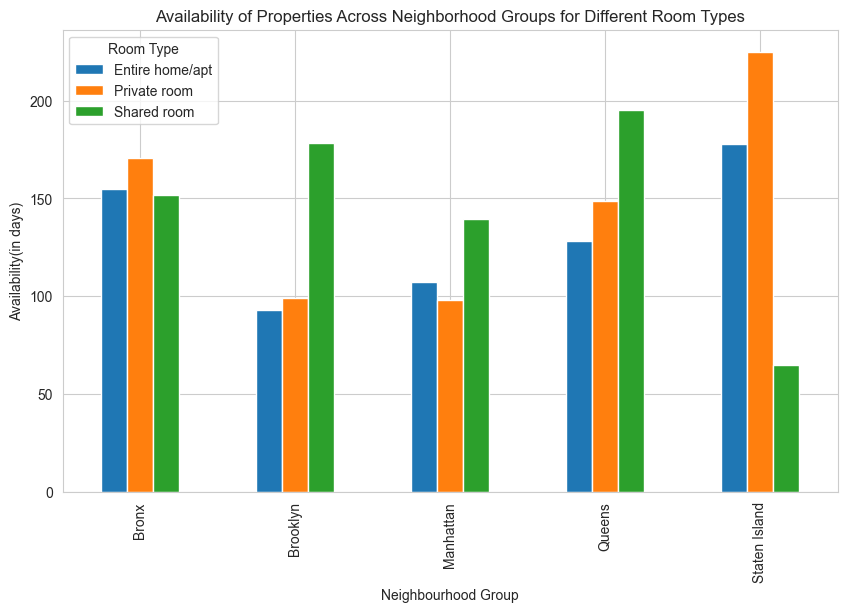

In [48]:
ax = availability.plot(kind='bar',figsize=(10, 6))
ax.set_title('Availability of Properties Across Neighborhood Groups for Different Room Types')
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Availability(in days)')
plt.legend(title='Room Type')
plt.show()

Busiest locations like Manhattan, Brooklyn and Queens shared rooms are the only option for last minute booking, as they have maximum availability. Whereas Bronx and Staten Island have entire homes, apartments or private rooms available, approximately for more than 5 months a year. Staten Island have private rooms with maximum availability (more than 6 months in a year) and very low availability for its shared accomodations.

#### Hosts with highest number of listings

In [60]:
top_host = df1.groupby(['host_id','host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
top_host = top_host.sort_values(by='calculated_host_listings_count',ascending=False).head(5).reset_index(drop=True)
top_host

,host_id,host_name,neighbourhood_group,calculated_host_listings_count
0,219517861,Sonder (NYC),Manhattan,327
1,107434423,Blueground,Brooklyn,232
2,107434423,Blueground,Manhattan,232
3,30283594,Kara,Manhattan,121
4,137358866,Kazuya,Queens,103


Host with maximum number of listings is Sonder(NYC) followed by Blueground.

#### Hosts with highest number of reviews.

In [52]:
most_reviewed_host = df1.groupby(['host_id','host_name','room_type','neighbourhood_group'])['number_of_reviews'].max().reset_index()
most_reviewed_host = most_reviewed_host.sort_values(by = 'number_of_reviews', ascending =False).head(10)
most_reviewed_host

,host_id,host_name,room_type,neighbourhood_group,number_of_reviews
22945,47621202,Dona,Private room,Queens,629
7156,4734398,Jj,Private room,Manhattan,607
20784,37312959,Maya,Private room,Queens,543
4264,2369681,Carol,Private room,Manhattan,540
18185,26432133,Danielle,Private room,Queens,510
12756,12949460,Asa,Entire home/apt,Brooklyn,488
1838,792159,Wanda,Private room,Brooklyn,480
4696,2680820,Linda,Private room,Queens,474
150,42273,Dani,Entire home/apt,Brooklyn,467
17092,23591164,Angela,Private room,Queens,466


<BarContainer object of 10 artists>

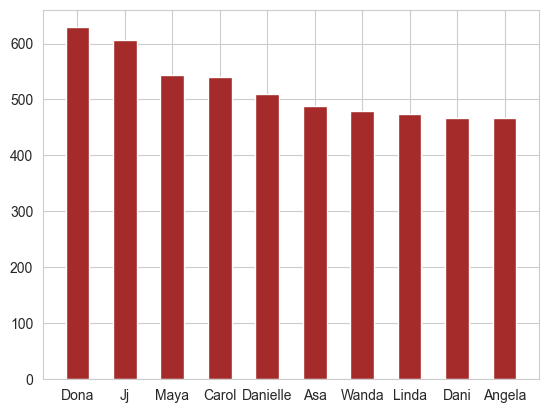

In [53]:
x=most_reviewed_host['host_name']
y=most_reviewed_host['number_of_reviews']                     
plt.bar(x,y,color ='brown', width =0.5)

These hosts have their listed room type as Private room or Entire home/apt in busiest neighbourhoods. They are preferred by most guests and have the highest number of reviews.

#### Number of reviews vs Price

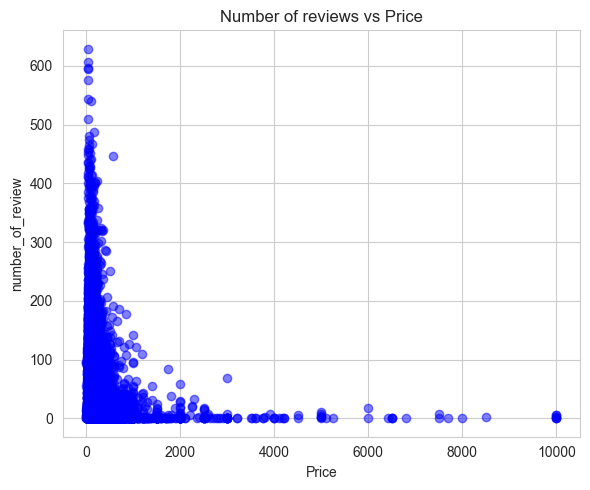

In [132]:
plt.figure(figsize=(6,5))
plt.scatter(df['price'],df['number_of_reviews'],alpha=0.5, color='b')
plt.xlabel('Price')
plt.ylabel('number_of_review')
plt.title('Number of reviews vs Price')
plt.tight_layout()
plt.show()

Properties listed at a lower price, have recieved higher number of reviews.

In [68]:
df1.head(2)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355


#### Number of reviews for various room types across neighbourhood groups

In [48]:
print("Number of reviews for various room types across neighbourhood groups:")
roomtype_review = df1.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].sum().unstack(level=1)
roomtype_review

Number of reviews for various room types across neighbourhood groups:


room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,11390,16257,431
Brooklyn,254511,212268,5779
Manhattan,206513,207495,10236
Queens,59362,93054,2713
Staten Island,5852,5669,14


Text(0, 0.5, 'Price')

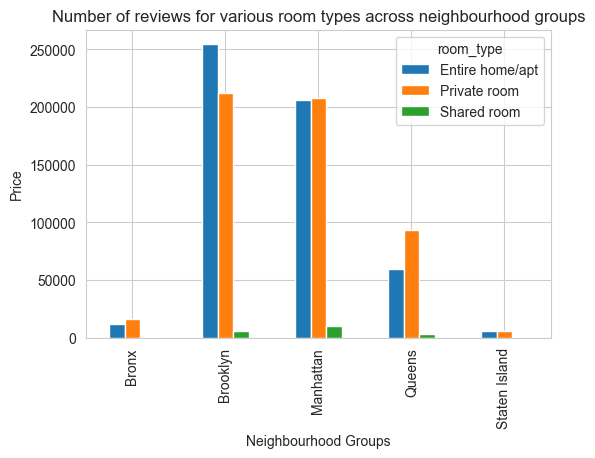

In [86]:
roomtype_review.plot(kind='bar',figsize=(6,4))
plt.title('Number of reviews for various room types across neighbourhood groups')
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Price')

Manhattan and Brooklyn have higher number of properties listed and therefore have recieved more number of reviews than all the other neighbourhoods.
- Brooklyn has received more reviews for entire home/ apartments than Manhattan and this may be because of difference in price.
- Manhattan has almost equal number of reviews for entire homes and private rooms.

#### Analyzing the names of listed properties

In [125]:
from wordcloud import WordCloud

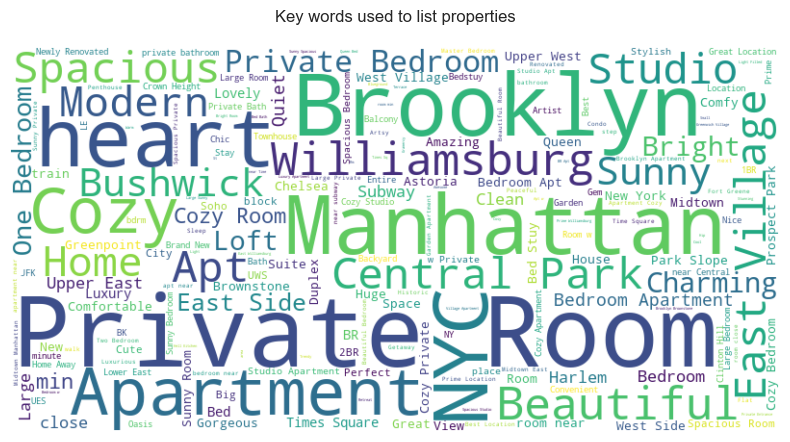

In [130]:
# Creating a string containing all 'name' values
text = ' '.join(df1['name'])

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Key words used to list properties\n")
plt.show()

Above wordcloud helps to analyze words that the hosts use frequently to list down their properties. 
- Location is a key indicator to differentiate listings as words like 'Manhattan' 'Brooklyn', 'Williamsberg','Central Park' etc. are more prominent.
- Adjectives like 'cozy', 'amazing','charming','beautiful','Quiet','Clean' etc which indicates that most hosts give top priority for a comfortable stay.
- The use of words like 'spacious', 'luxury','huge space','Large' etc. shows demand for premium spaces.
- Word 'Private room' is also prominantly displayed, which indicates its popularity in NYC.

## Conclusion

- Brooklyn and Manhattan are the most preferred locations as they have maximum number of Airbnb listings in the entire New York city. 

- Williamsburg and Bedford-Stuyvesant in Brooklyn borough are found to be the most popular neighbourhoods. 

- Average price of properties is found to be maximum in Manhattan (above 140 dollars), which has most number of premium accomodations, followed by Brooklyn (above 100 dollars) when compared to the rest of the city.

- Entire homes or apartments have the maximum share, followed by private rooms. Customer preference for shared rooms in NYC is low.

- Brooklyn, Queens and Bronx have more number of private rooms whereas Manhattan has more number of entire homes or apartments. In all the neighbourhoods entire homes or apartments are expensive compared to private rooms and shared rooms. Except in Manhattan, average price of shared rooms in all other neighbourhood groups are almost the same. Cheapest among all is Bronx.

- Guests prefer entire room or apartments, if they wish to stay for more than a week. Private rooms and shared rooms are preferred for a maximum of 4-5 nights.

- Maximum number of properties which are available almost all throughout the year is found in Staten Island followed by Bronx, which are less populated compared to busiest neighbourhoods like Manhattan and Brooklyn.

- All the top 10 hosts have more than 100 listings, and the top most in the list, have listed more than 300 properties. 

- Most reviewed hosts have their properties listed in busiest neighbourhoods.

- Properties listed at a lower price, have received higher number of reviews.

- Manhattan and Brooklyn has the maximum number of listings and therefore have recieved more number of reviews than all the other neighbourhoods.

- Key words in property listing has indicated that most of the hosts have used location-oriented words and adjectives which highlight the comfort of the guest.